## Capstone- Cancer Histopathology: Model Comparison

Dataset:
- A. Borkowski, "Lung and Colon Cancer Histopathological Images", Kaggle.com, 2020. [Online]. Available: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images. [Accessed: 30- Jul- 2022].

Sources:
- Borkowski AA, Bui MM, Thomas LB, Wilson CP, DeLand LA, Mastorides SM. Lung and Colon Cancer Histopathological Image Dataset (LC25000). arXiv:1912.12142v1 [eess.IV], 2019

Image Labels:
- Lung benign tissue: 3
- Lung adenocarcinoma: 2
- Lung squamous cell carcinoma: 4
- Colon adenocarcinoma: 0
- Colon benign tissue: 1

### Import Libraries

In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import re as regex
from pathlib import Path
import time
import math

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

import string
from collections import Counter

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load Data

In [2]:
import PIL
from PIL import Image
import glob
import os, os.path
from numpy import asarray

import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from IPython.display import display, HTML
import pymongo
from pymongo import MongoClient
import io
from bson.binary import Binary

In [3]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras.applications.xception import Xception
from keras.applications import *
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from keras.layers import BatchNormalization
from keras.models import load_model

In [4]:
dfSimpleModel = pd.read_csv("modelComparison.csv")

In [5]:
dfSimpleModel

,Unnamed: 0,accuracy,precision,recall,f1-score,roc_auc,model,runtime_ms,meanAcc
0,0,0.765600,0.766980,0.766260,0.765996,0.945376,logisticRegression,1144.690275,0.759543
1,1,0.746533,0.751486,0.748377,0.743542,0.926728,supportVectorMachine,94941.241026,0.718000
2,2,0.886267,0.886654,0.886937,0.886371,0.983922,gradientBoost,291618.203163,0.886229


In [6]:
dfSimpleModel.drop(['Unnamed: 0', 'model'], axis= 1, inplace= True)

In [7]:
modelTag= ['cnnMk01', 'cnnMk02', 'cnnMk03', 'cnnMk04', 'cnnMk05', 'cnnMk06',
           'VGG16', 'VGG19', 'Xception', 'InceptionV3']
imageTag= []
for i in range(31, 45):
    if (i <= 9):
        img= f'image0{i}'
        imageTag.append(img)
    else:
        img= f'image{i}'
        imageTag.append(img)
imageTag

['image31',
 'image32',
 'image33',
 'image34',
 'image35',
 'image36',
 'image37',
 'image38',
 'image39',
 'image40',
 'image41',
 'image42',
 'image43',
 'image44']

In [8]:
fitTimeArr= np.load('preTrainFitTime.npy', allow_pickle= True)
cnnMk01Arr= np.load('cnnMk01Arr.npy', allow_pickle= True)
cnnMk02Arr= np.load('cnnMk02Arr.npy', allow_pickle= True)
cnnMk03Arr= np.load('cnnMk03Arr.npy', allow_pickle= True)
cnnMk04Arr= np.load('cnnMk04Arr.npy', allow_pickle= True)
cnnMk05Arr= np.load('cnnMk05Arr.npy', allow_pickle= True)
cnnMk06Arr= np.load('cnnMk06Arr.npy', allow_pickle= True)
vgg16Arr= np.load('vgg16Arr.npy', allow_pickle= True)
vgg19Arr= np.load('vgg19Arr.npy', allow_pickle= True)
xceptionArr= np.load('xceptionArr.npy', allow_pickle= True)
inceptionV3Arr= np.load('inceptionV3Arr.npy', allow_pickle= True)

In [9]:
modelArr= []
modelArr.append(cnnMk01Arr)
modelArr.append(cnnMk02Arr)
modelArr.append(cnnMk03Arr)
modelArr.append(cnnMk04Arr)
modelArr.append(cnnMk05Arr)
modelArr.append(cnnMk06Arr)
modelArr.append(vgg16Arr)
modelArr.append(vgg19Arr)
modelArr.append(xceptionArr)
modelArr.append(inceptionV3Arr)

modelArr

[array([9.17066693e-01, 9.18771637e-01, 9.16347099e-01, 9.16616034e-01,
        7.50000000e+03, 5.25982885e+04, 9.26800001e-01]),
 array([9.59999979e-01, 9.60476192e-01, 9.59768757e-01, 9.59861114e-01,
        7.50000000e+03, 4.03322597e+05, 9.62228572e-01]),
 array([9.18133318e-01, 9.24026582e-01, 9.17581210e-01, 9.18658219e-01,
        7.50000000e+03, 6.35963478e+04, 9.22800004e-01]),
 array([8.84666681e-01, 9.03899939e-01, 8.87047618e-01, 8.81691901e-01,
        7.50000000e+03, 7.44680181e+04, 8.97599995e-01]),
 array([9.34800029e-01, 9.37678384e-01, 9.34384181e-01, 9.34750708e-01,
        7.50000000e+03, 4.22985926e+04, 9.34285700e-01]),
 array([9.50933337e-01, 9.50845406e-01, 9.50948604e-01, 9.50693058e-01,
        7.50000000e+03, 5.85722568e+04, 9.56799984e-01]),
 array([9.60666656e-01, 9.61174377e-01, 9.60577113e-01, 9.60408467e-01,
        7.50000000e+03, 3.81787840e+05, 9.72971451e-01]),
 array([9.52133358e-01, 9.53982825e-01, 9.51647223e-01, 9.51870556e-01,
        7.50000000

In [10]:
comparisonCols= ['accuracy', 'precision', 'recall', 'f1-score', 'roc_auc', 'runtime_ms',
                 'meanAcc']

In [11]:
dfCnnModel= pd.DataFrame(modelArr, columns= comparisonCols)
dfCnnModel

,accuracy,precision,recall,f1-score,roc_auc,runtime_ms,meanAcc
0,0.917067,0.918772,0.916347,0.916616,7500.0,5.259829e+04,0.926800
1,0.960000,0.960476,0.959769,0.959861,7500.0,4.033226e+05,0.962229
2,0.918133,0.924027,0.917581,0.918658,7500.0,6.359635e+04,0.922800
3,0.884667,0.903900,0.887048,0.881692,7500.0,7.446802e+04,0.897600
4,0.934800,0.937678,0.934384,0.934751,7500.0,4.229859e+04,0.934286
5,0.950933,0.950845,0.950949,0.950693,7500.0,5.857226e+04,0.956800
6,0.960667,0.961174,0.960577,0.960408,7500.0,3.817878e+05,0.972971
7,0.952133,0.953983,0.951647,0.951871,7500.0,4.716761e+05,0.967429
8,0.749467,0.809777,0.752183,0.736641,7500.0,2.408041e+05,0.736000
9,0.610667,0.736239,0.609766,0.552270,7500.0,2.192598e+06,0.550000


In [12]:
dfSimpleModel

,accuracy,precision,recall,f1-score,roc_auc,runtime_ms,meanAcc
0,0.765600,0.766980,0.766260,0.765996,0.945376,1144.690275,0.759543
1,0.746533,0.751486,0.748377,0.743542,0.926728,94941.241026,0.718000
2,0.886267,0.886654,0.886937,0.886371,0.983922,291618.203163,0.886229


In [13]:
dfNewData= pd.concat([dfSimpleModel, dfCnnModel], axis= 0)

In [14]:
dfNewData

,accuracy,precision,recall,f1-score,roc_auc,runtime_ms,meanAcc
0,0.765600,0.766980,0.766260,0.765996,0.945376,1.144690e+03,0.759543
1,0.746533,0.751486,0.748377,0.743542,0.926728,9.494124e+04,0.718000
2,0.886267,0.886654,0.886937,0.886371,0.983922,2.916182e+05,0.886229
0,0.917067,0.918772,0.916347,0.916616,7500.000000,5.259829e+04,0.926800
1,0.960000,0.960476,0.959769,0.959861,7500.000000,4.033226e+05,0.962229
2,0.918133,0.924027,0.917581,0.918658,7500.000000,6.359635e+04,0.922800
3,0.884667,0.903900,0.887048,0.881692,7500.000000,7.446802e+04,0.897600
4,0.934800,0.937678,0.934384,0.934751,7500.000000,4.229859e+04,0.934286
5,0.950933,0.950845,0.950949,0.950693,7500.000000,5.857226e+04,0.956800
6,0.960667,0.961174,0.960577,0.960408,7500.000000,3.817878e+05,0.972971


In [15]:
dfNewData.drop(['roc_auc'], axis= 1, inplace= True)

In [16]:
def convertToMinutes(runTime):
    minRunTime= runTime / 60000.0
    return minRunTime

In [17]:
%%time
dfNewData['runTime_min']= dfNewData['runtime_ms'].apply(convertToMinutes)

CPU times: total: 0 ns
Wall time: 998 µs


In [18]:
dfNewData

,accuracy,precision,recall,f1-score,runtime_ms,meanAcc,runTime_min
0,0.765600,0.766980,0.766260,0.765996,1.144690e+03,0.759543,0.019078
1,0.746533,0.751486,0.748377,0.743542,9.494124e+04,0.718000,1.582354
2,0.886267,0.886654,0.886937,0.886371,2.916182e+05,0.886229,4.860303
0,0.917067,0.918772,0.916347,0.916616,5.259829e+04,0.926800,0.876638
1,0.960000,0.960476,0.959769,0.959861,4.033226e+05,0.962229,6.722043
2,0.918133,0.924027,0.917581,0.918658,6.359635e+04,0.922800,1.059939
3,0.884667,0.903900,0.887048,0.881692,7.446802e+04,0.897600,1.241134
4,0.934800,0.937678,0.934384,0.934751,4.229859e+04,0.934286,0.704977
5,0.950933,0.950845,0.950949,0.950693,5.857226e+04,0.956800,0.976204
6,0.960667,0.961174,0.960577,0.960408,3.817878e+05,0.972971,6.363131


In [19]:
modelNames= ['logisticRegression', 'supportVectorMachine', 'gradientBoost', 'cnnMk01',
             'cnnMk02', 'cnnMk03', 'cnnMk04', 'cnnMk05', 'cnnMk06', 'VGG16', 'VGG19',
             'Xception', 'InceptionV3']

In [20]:
dfNewData['model']= modelNames

In [21]:
dfNewData

,accuracy,precision,recall,f1-score,runtime_ms,meanAcc,runTime_min,model
0,0.765600,0.766980,0.766260,0.765996,1.144690e+03,0.759543,0.019078,logisticRegression
1,0.746533,0.751486,0.748377,0.743542,9.494124e+04,0.718000,1.582354,supportVectorMachine
2,0.886267,0.886654,0.886937,0.886371,2.916182e+05,0.886229,4.860303,gradientBoost
0,0.917067,0.918772,0.916347,0.916616,5.259829e+04,0.926800,0.876638,cnnMk01
1,0.960000,0.960476,0.959769,0.959861,4.033226e+05,0.962229,6.722043,cnnMk02
2,0.918133,0.924027,0.917581,0.918658,6.359635e+04,0.922800,1.059939,cnnMk03
3,0.884667,0.903900,0.887048,0.881692,7.446802e+04,0.897600,1.241134,cnnMk04
4,0.934800,0.937678,0.934384,0.934751,4.229859e+04,0.934286,0.704977,cnnMk05
5,0.950933,0.950845,0.950949,0.950693,5.857226e+04,0.956800,0.976204,cnnMk06
6,0.960667,0.961174,0.960577,0.960408,3.817878e+05,0.972971,6.363131,VGG16


In [22]:
dfNewData

,accuracy,precision,recall,f1-score,runtime_ms,meanAcc,runTime_min,model
0,0.765600,0.766980,0.766260,0.765996,1.144690e+03,0.759543,0.019078,logisticRegression
1,0.746533,0.751486,0.748377,0.743542,9.494124e+04,0.718000,1.582354,supportVectorMachine
2,0.886267,0.886654,0.886937,0.886371,2.916182e+05,0.886229,4.860303,gradientBoost
0,0.917067,0.918772,0.916347,0.916616,5.259829e+04,0.926800,0.876638,cnnMk01
1,0.960000,0.960476,0.959769,0.959861,4.033226e+05,0.962229,6.722043,cnnMk02
2,0.918133,0.924027,0.917581,0.918658,6.359635e+04,0.922800,1.059939,cnnMk03
3,0.884667,0.903900,0.887048,0.881692,7.446802e+04,0.897600,1.241134,cnnMk04
4,0.934800,0.937678,0.934384,0.934751,4.229859e+04,0.934286,0.704977,cnnMk05
5,0.950933,0.950845,0.950949,0.950693,5.857226e+04,0.956800,0.976204,cnnMk06
6,0.960667,0.961174,0.960577,0.960408,3.817878e+05,0.972971,6.363131,VGG16


In [23]:
dfNewData.sort_values('recall', ascending= False, inplace= True)

In [24]:
dfNewData

,accuracy,precision,recall,f1-score,runtime_ms,meanAcc,runTime_min,model
6,0.960667,0.961174,0.960577,0.960408,3.817878e+05,0.972971,6.363131,VGG16
1,0.960000,0.960476,0.959769,0.959861,4.033226e+05,0.962229,6.722043,cnnMk02
7,0.952133,0.953983,0.951647,0.951871,4.716761e+05,0.967429,7.861268,VGG19
5,0.950933,0.950845,0.950949,0.950693,5.857226e+04,0.956800,0.976204,cnnMk06
4,0.934800,0.937678,0.934384,0.934751,4.229859e+04,0.934286,0.704977,cnnMk05
2,0.918133,0.924027,0.917581,0.918658,6.359635e+04,0.922800,1.059939,cnnMk03
0,0.917067,0.918772,0.916347,0.916616,5.259829e+04,0.926800,0.876638,cnnMk01
3,0.884667,0.903900,0.887048,0.881692,7.446802e+04,0.897600,1.241134,cnnMk04
2,0.886267,0.886654,0.886937,0.886371,2.916182e+05,0.886229,4.860303,gradientBoost
0,0.765600,0.766980,0.766260,0.765996,1.144690e+03,0.759543,0.019078,logisticRegression


In [25]:
dfModelIndex= dfNewData.copy(deep=True)
dfModelIndex.set_index('model', inplace=True)
dfModelIndex

,accuracy,precision,recall,f1-score,runtime_ms,meanAcc,runTime_min
model,,,,,,,
VGG16,0.960667,0.961174,0.960577,0.960408,3.817878e+05,0.972971,6.363131
cnnMk02,0.960000,0.960476,0.959769,0.959861,4.033226e+05,0.962229,6.722043
VGG19,0.952133,0.953983,0.951647,0.951871,4.716761e+05,0.967429,7.861268
cnnMk06,0.950933,0.950845,0.950949,0.950693,5.857226e+04,0.956800,0.976204
cnnMk05,0.934800,0.937678,0.934384,0.934751,4.229859e+04,0.934286,0.704977
cnnMk03,0.918133,0.924027,0.917581,0.918658,6.359635e+04,0.922800,1.059939
cnnMk01,0.917067,0.918772,0.916347,0.916616,5.259829e+04,0.926800,0.876638
cnnMk04,0.884667,0.903900,0.887048,0.881692,7.446802e+04,0.897600,1.241134
gradientBoost,0.886267,0.886654,0.886937,0.886371,2.916182e+05,0.886229,4.860303


In [26]:
dfModelIndex.sort_values('recall', ascending= False, inplace= True)

In [27]:
dfModelIndex

,accuracy,precision,recall,f1-score,runtime_ms,meanAcc,runTime_min
model,,,,,,,
VGG16,0.960667,0.961174,0.960577,0.960408,3.817878e+05,0.972971,6.363131
cnnMk02,0.960000,0.960476,0.959769,0.959861,4.033226e+05,0.962229,6.722043
VGG19,0.952133,0.953983,0.951647,0.951871,4.716761e+05,0.967429,7.861268
cnnMk06,0.950933,0.950845,0.950949,0.950693,5.857226e+04,0.956800,0.976204
cnnMk05,0.934800,0.937678,0.934384,0.934751,4.229859e+04,0.934286,0.704977
cnnMk03,0.918133,0.924027,0.917581,0.918658,6.359635e+04,0.922800,1.059939
cnnMk01,0.917067,0.918772,0.916347,0.916616,5.259829e+04,0.926800,0.876638
cnnMk04,0.884667,0.903900,0.887048,0.881692,7.446802e+04,0.897600,1.241134
gradientBoost,0.886267,0.886654,0.886937,0.886371,2.916182e+05,0.886229,4.860303


In [28]:
filepath = Path('superiorModel.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
dfModelIndex.to_csv(filepath)

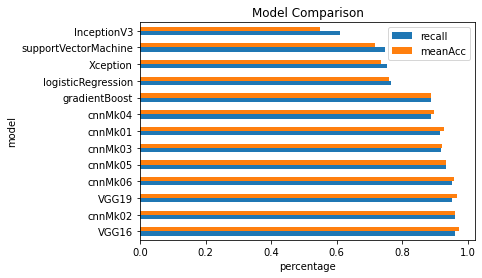

In [29]:
ax= dfNewData.plot.barh(x='model', y= ['recall', 'meanAcc'])
ax.set_xlabel('percentage')
# ax.set_ylabel('model')
ax.set_title('Model Comparison')
plt.savefig(f'image42.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

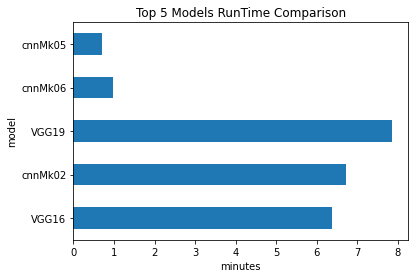

In [30]:
ax= dfNewData[0:5].plot.barh(x='model', y= ['runTime_min'])
ax.set_xlabel('minutes')
# ax.set_ylabel('model')
ax.set_title('Top 5 Models RunTime Comparison')
ax.get_legend().remove()
plt.savefig(f'image44.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()